In [ ]:
#Change runtime to GPU

In [1]:
#Ignore all the unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
! pip install datasets transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.3 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.

In [3]:
!pip install accelerate -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 9.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [4]:
#Importing dataset module
from datasets import list_datasets

In [7]:
#Loading the dataset
from datasets import load_dataset

emotions = load_dataset('dair-ai/emotion')

The repository for dair-ai/emotion contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/dair-ai/emotion.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

### Questions:

1 - What is the data stucture type of the loaded dataset?

2 - Is the data splitted into different categories?

3 - If yes how many categories are there? And how many data points are present in each categories?

In [8]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [ ]:
# Your code

<class 'datasets.dataset_dict.DatasetDict'>
<class 'datasets.arrow_dataset.Dataset'>


### Question:

How do you acess data from the given data structure?

In [ ]:
# Access the individual splits
# Your code
train_ds = 

(Dataset({
     features: ['text', 'label'],
     num_rows: 16000
 }),
 16000)

In [ ]:
# Your code

{'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'im grabbing a minute to post i feel greedy wrong',
  'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
  'i am feeling grouchy'],
 'label': [0, 0, 3, 2, 3]}

['text', 'label']

In [ ]:
## Access the column description using 'features' function of train dataset
# Your code

{'text': Value(dtype='string', id=None), 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}


### Questions:

1 - Is data visualization necessary?

2 - If yes, how do you do it with the given data structure?

In [14]:
import pandas as pd

emotions.set_format(type='pandas')
df = emotions['train'][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [15]:
len(df)

16000

In [16]:
# Let's add a new column with corresponding label names

def label_int2str(row):
    return emotions["train"].features["label"].int2str(row)

df['label_name'] = df['label'].apply(label_int2str)
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


### Question:

1 - Which package should be used for visualization?

2 - What plots will you use to visualize the data?

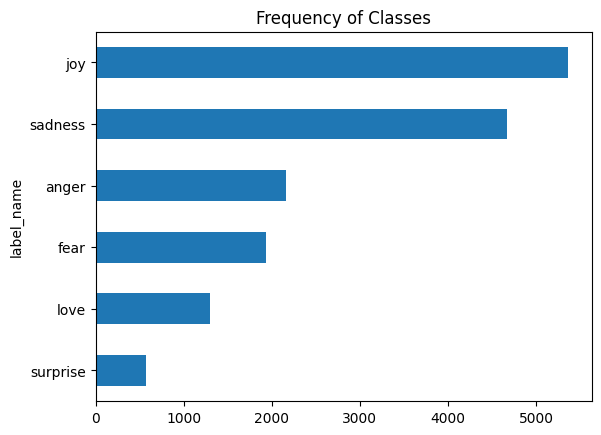

In [17]:
#Plots

import matplotlib.pyplot as plt

df['label_name'].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes")
plt.show()

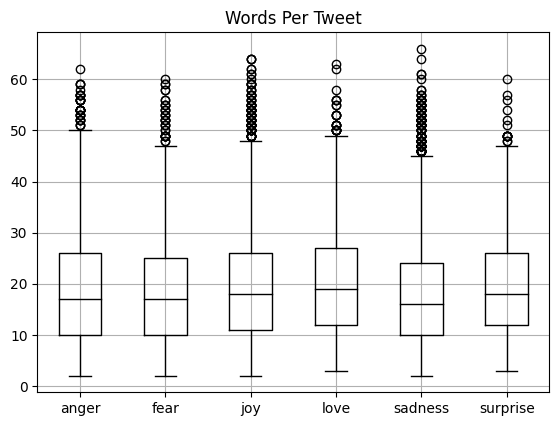

In [18]:
df["Words Per Tweet"] = df["text"].str.split().apply(len)
df.boxplot("Words Per Tweet", by='label_name',grid='False',color='black')
plt.suptitle("")
plt.xlabel("")
plt.show()

### Question:

Can we use the same data format i.e pandas to train the model? If not reset the format.

In [ ]:
# Resetting the format of dataframe as we don't need it anymore
# Your code

### Questions:

1 - Can we feed the data to model as it is?

2 - If yes how? If no, what needs to be done?

In [20]:
# Text to Tokens

sample = 'Tokenizing text is a core task of NLP.'
sample

'Tokenizing text is a core task of NLP.'

## Character Tokenization

In [21]:
# Character Tokenization

tokenized_sample = list(sample)
tokenized_sample

['T',
 'o',
 'k',
 'e',
 'n',
 'i',
 'z',
 'i',
 'n',
 'g',
 ' ',
 't',
 'e',
 'x',
 't',
 ' ',
 'i',
 's',
 ' ',
 'a',
 ' ',
 'c',
 'o',
 'r',
 'e',
 ' ',
 't',
 'a',
 's',
 'k',
 ' ',
 'o',
 'f',
 ' ',
 'N',
 'L',
 'P',
 '.']

In [22]:
# Creating token Ids

token2idx = {ch:idx for idx, ch in enumerate(sorted(set(tokenized_sample)))}
print(token2idx)

{' ': 0, '.': 1, 'L': 2, 'N': 3, 'P': 4, 'T': 5, 'a': 6, 'c': 7, 'e': 8, 'f': 9, 'g': 10, 'i': 11, 'k': 12, 'n': 13, 'o': 14, 'r': 15, 's': 16, 't': 17, 'x': 18, 'z': 19}


In [23]:
# We can now use this variable to get list of integers for the tokens

input_ids = [token2idx[token] for token in tokenized_sample]
input_ids

[5,
 14,
 12,
 8,
 13,
 11,
 19,
 11,
 13,
 10,
 0,
 17,
 8,
 18,
 17,
 0,
 11,
 16,
 0,
 6,
 0,
 7,
 14,
 15,
 8,
 0,
 17,
 6,
 16,
 12,
 0,
 14,
 9,
 0,
 3,
 2,
 4,
 1]

In [24]:
# One Hot Encodings

import torch
import torch.nn.functional as F

input_ids = torch.tensor(input_ids)
one_hot_encodings = F.one_hot(input_ids, num_classes=len(token2idx))
one_hot_encodings.shape

torch.Size([38, 20])

In [25]:
print(f"Token: {tokenized_sample[2]}")
print(f"Tensor index: {input_ids[2]}")
print(f"one-hot: {one_hot_encodings[2]}")

Token: k
Tensor index: 12
one-hot: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])


### Question:

Is this a good way to feed the data to the model?

## Word Tokenization

In [26]:
# Word Tokenization

tokenized_sample = sample.split()
tokenized_sample

['Tokenizing', 'text', 'is', 'a', 'core', 'task', 'of', 'NLP.']

In [ ]:
# Creating token Ids
# Your code

{'NLP.': 0, 'Tokenizing': 1, 'a': 2, 'core': 3, 'is': 4, 'of': 5, 'task': 6, 'text': 7}


In [ ]:
# We can now use this variable to get list of integers for the tokens
# Your code

[1, 7, 4, 2, 3, 6, 5, 0]

In [29]:
# One Hot Encodings

import torch
import torch.nn.functional as F

input_ids = torch.tensor(input_ids)
one_hot_encodings = F.one_hot(input_ids, num_classes=len(token2idx))
one_hot_encodings.shape

torch.Size([8, 8])

In [30]:
print(f"Token: {tokenized_sample[2]}")
print(f"Tensor index: {input_ids[2]}")
print(f"one-hot: {one_hot_encodings[2]}")

Token: is
Tensor index: 4
one-hot: tensor([0, 0, 0, 0, 1, 0, 0, 0])


### Question

Is this a good way to feed the data to the model?

## Subword Tokenization

### WordPiece used by BERT and DistilBERT

More about WordPiece tokenization - https://huggingface.co/learn/nlp-course/chapter6/6

In [31]:
from transformers import AutoTokenizer

In [32]:
model_ckpt = 'distilbert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [33]:
# Alternative way - from transformers import DistilBertTokenizer

In [34]:
text_ids = tokenizer(sample)
print(text_ids)

{'input_ids': [101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [35]:
# Checking the words in model's vocab

tokens = tokenizer.convert_ids_to_tokens(text_ids.input_ids)
tokens

['[CLS]',
 'token',
 '##izing',
 'text',
 'is',
 'a',
 'core',
 'task',
 'of',
 'nl',
 '##p',
 '.',
 '[SEP]']

In [36]:
tokenizer.convert_tokens_to_string(tokens)

'[CLS] tokenizing text is a core task of nlp. [SEP]'

In [37]:
tokenizer.vocab_size

30522

In [38]:
tokenizer.model_max_length

512

In [39]:
tokenizer.model_input_names

['input_ids', 'attention_mask']

### Question

Which is the best way of above 3 to feed the data to the model? Why?

## Tokenizing the Whole Dataset

In [40]:
# Tokenize the whole dataset

def tokenize(batch):
    return tokenizer(batch['text'], padding=True, truncation=True)

In [41]:
# Check tokens of any of the data point
print(tokenize(emotions["train"][:2]))

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


### Question:

Why do we need attention masks?

In [42]:
# Note -  Attention masks helps model to ignore the padded areas of input tensors

In [43]:
# Applying to the whole dataset

emotions_encoded = emotions.map(tokenize, batched = True, batch_size=None)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [44]:
emotions_encoded

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
})

### Questions:

1 - What are the ways the model can be trained on the pre-processed data?

2 - Can we use the Transformer model as feature extractors? If yes, how does it work?

3 - Can we fine-tune? How does fine-tuning work?

In [45]:
from transformers import AutoModel

In [46]:
model_ckpt = 'distilbert-base-uncased'

In [47]:
# Initialize device as GPU and transfer your model to GPU

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModel.from_pretrained(model_ckpt).to(device)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [48]:
# Check the model architecture
model

DistilBertModel(
  (embeddings): Embeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (transformer): Transformer(
    (layer): ModuleList(
      (0-5): 6 x TransformerBlock(
        (attention): MultiHeadSelfAttention(
          (dropout): Dropout(p=0.1, inplace=False)
          (q_lin): Linear(in_features=768, out_features=768, bias=True)
          (k_lin): Linear(in_features=768, out_features=768, bias=True)
          (v_lin): Linear(in_features=768, out_features=768, bias=True)
          (out_lin): Linear(in_features=768, out_features=768, bias=True)
        )
        (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (ffn): FFN(
          (dropout): Dropout(p=0.1, inplace=False)
          (lin1): Linear(in_features=768, out_features=3072, bias=True)
          (lin2): Li

## Transformers as Feature Extractors

In [49]:
## Example of getting last hidden states
text = "this is a test"
test_inps = tokenizer(text)
inputs = tokenizer(text, return_tensors='pt')
print(f"Input tensor shape: {inputs['input_ids'].size()}")

Input tensor shape: torch.Size([1, 6])


In [50]:
# Note - Resulting tensor has shape [batch size, n_tokens]

In [51]:
tokenizer.convert_ids_to_tokens(test_inps.input_ids)

['[CLS]', 'this', 'is', 'a', 'test', '[SEP]']

In [52]:
inputs

{'input_ids': tensor([[ 101, 2023, 2003, 1037, 3231,  102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1]])}

In [53]:
inputs = {k:v.to(device) for k, v in inputs.items()}
with torch.no_grad():
    outputs = model(**inputs)
print(outputs)

BaseModelOutput(last_hidden_state=tensor([[[-0.1565, -0.1862,  0.0528,  ..., -0.1188,  0.0662,  0.5470],
         [-0.3575, -0.6484, -0.0618,  ..., -0.3040,  0.3508,  0.5221],
         [-0.2772, -0.4459,  0.1818,  ..., -0.0948, -0.0076,  0.9958],
         [-0.2841, -0.3917,  0.3753,  ..., -0.2151, -0.1173,  1.0526],
         [ 0.2661, -0.5094, -0.3180,  ..., -0.4203,  0.0144, -0.2149],
         [ 0.9441,  0.0112, -0.4714,  ...,  0.1439, -0.7288, -0.1619]]],
       device='cuda:0'), hidden_states=None, attentions=None)


In [54]:
outputs.last_hidden_state.size()

torch.Size([1, 6, 768])

In [55]:
outputs.last_hidden_state[:,0].shape   #Using just the hidden state of [CLS] token as it is common practice

torch.Size([1, 768])

In [ ]:
# Write function to get hiddenstates from whole dataset. Use above code as reference
# Your code

In [58]:
#Note : We require our output back into cpu and numpy as map() function requires the processing function to return when we are using batched inputs

In [59]:
emotions_encoded.set_format("torch", columns=["input_ids", "attention_mask","label"])  #Since our model expects inputs as tensors

In [60]:
#Use above created function to extract hidden states from the whole dataset

emotions_hidden = emotions_encoded.map(extract_hidden_states, batched=True)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

### Question:

Check the columns of the dataset again? What has changed?

In [ ]:
# Write code to check the columns again
# Your code

['text', 'label', 'input_ids', 'attention_mask', 'hidden_state']

In [62]:
emotions_hidden

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask', 'hidden_state'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask', 'hidden_state'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask', 'hidden_state'],
        num_rows: 2000
    })
})

### Question

What is the next step after getting hidden states?

In [ ]:
import numpy as np

X_train = np.array(emotions_hidden["train"]["hidden_state"])
X_valid = np.array(emotions_hidden["validation"]["hidden_state"])

#Write a code to get target data splits into variables


# Check the shape of the dataset variables


((16000, 768), (2000, 768))

### Training a Simple Classifier

In [ ]:
# Write a code to train a Logistic Classifier , keep the max_iter=3000
# Your code

0.634

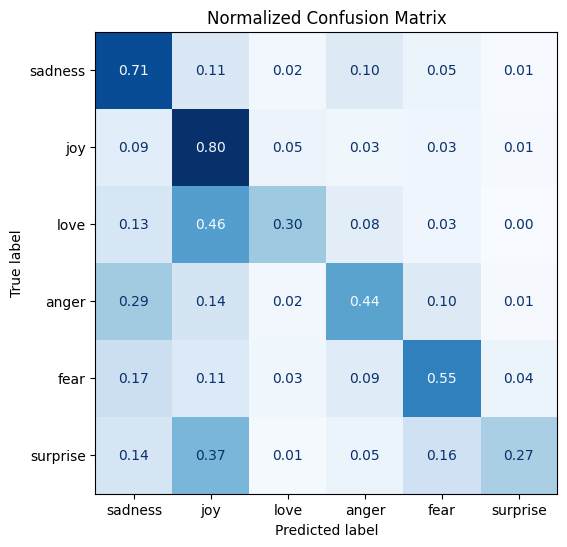

In [65]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize = (6,6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format = ".2f", ax=ax, colorbar = False)
    plt.title("Normalized Confusion Matrix")
    plt.show()

labels = emotions["train"].features["label"].names

# Plot a confusion matrix using above function
y_preds = lr_clf.predict(X_valid)
plot_confusion_matrix(y_preds,y_valid, labels)

## Fine Tuning Transformers

In [66]:
from transformers import AutoModelForSequenceClassification    #Calling the model from different class

### Question

What should be the number of target classes?

In [67]:

num_labels = 6
model = AutoModelForSequenceClassification.from_pretrained(model_ckpt, num_labels=num_labels).to(device)

# Check model architecture
model

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

### Question

1 - Do we need to add a classifier head to existing architecture?

2 - What is difference between accuracy and f1 score and when they are used?

In [68]:
#Defining the metrics

from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)
    return {"accuracy" : acc, "f1" : f1}

In [69]:
from transformers import Trainer, TrainingArguments

batch_size = 64
logging_steps = len(emotions_encoded["train"]) // batch_size
model_name = f"{model_ckpt}-finetuned-emotion"
training_args = TrainingArguments(output_dir=model_name,
                                 num_train_epochs=2,
                                 learning_rate=2e-5,
                                 per_device_train_batch_size=batch_size,
                                 per_gpu_eval_batch_size=batch_size,
                                 weight_decay=0.01,
                                 evaluation_strategy="epoch",
                                 disable_tqdm="False",
                                 logging_steps=logging_steps,
                                 log_level="error")

In [70]:
trainer = Trainer(model=model,
                 args=training_args,
                 compute_metrics=compute_metrics,
                 train_dataset=emotions_encoded["train"],
                 eval_dataset=emotions_encoded["validation"],
                 tokenizer=tokenizer)

trainer.train()

{'loss': 0.8145, 'grad_norm': 4.136999130249023, 'learning_rate': 1e-05, 'epoch': 1.0}
{'eval_loss': 0.30674606561660767, 'eval_accuracy': 0.905, 'eval_f1': 0.9041048404852664, 'eval_runtime': 3.9513, 'eval_samples_per_second': 506.163, 'eval_steps_per_second': 8.099, 'epoch': 1.0}
{'loss': 0.2392, 'grad_norm': 9.667584419250488, 'learning_rate': 0.0, 'epoch': 2.0}
{'eval_loss': 0.21692532300949097, 'eval_accuracy': 0.924, 'eval_f1': 0.9241786893819579, 'eval_runtime': 3.9116, 'eval_samples_per_second': 511.302, 'eval_steps_per_second': 8.181, 'epoch': 2.0}
{'train_runtime': 232.4461, 'train_samples_per_second': 137.666, 'train_steps_per_second': 2.151, 'train_loss': 0.5268576889038086, 'epoch': 2.0}


TrainOutput(global_step=500, training_loss=0.5268576889038086, metrics={'train_runtime': 232.4461, 'train_samples_per_second': 137.666, 'train_steps_per_second': 2.151, 'train_loss': 0.5268576889038086, 'epoch': 2.0})

In [71]:
# Pred outputs
preds_output = trainer.predict(emotions_encoded["validation"])
preds_output.metrics

{'test_loss': 0.21692532300949097,
 'test_accuracy': 0.924,
 'test_f1': 0.9241786893819579,
 'test_runtime': 3.8508,
 'test_samples_per_second': 519.368,
 'test_steps_per_second': 8.31}

In [72]:
preds_output.predictions

array([[ 4.3138022 , -0.36378708, -1.3451287 , -0.7862317 , -0.84675145,
        -1.505742  ],
       [ 4.5135083 , -0.68593305, -1.6297809 , -0.48657474, -0.56069064,
        -1.381719  ],
       [-1.2538475 ,  1.7763188 ,  2.8370824 , -0.9179856 , -1.6257432 ,
        -1.1776592 ],
       ...,
       [-0.9993578 ,  4.4141126 , -0.18513624, -1.2338855 , -1.2756689 ,
        -1.3034934 ],
       [-1.8870542 ,  2.52365   ,  2.5211346 , -1.213408  , -1.6218584 ,
        -1.0636768 ],
       [-1.3819085 ,  4.191679  , -0.6155575 , -1.4770538 , -1.2508589 ,
        -0.36171356]], dtype=float32)

In [73]:
y_preds = np.argmax(preds_output.predictions, axis = 1)

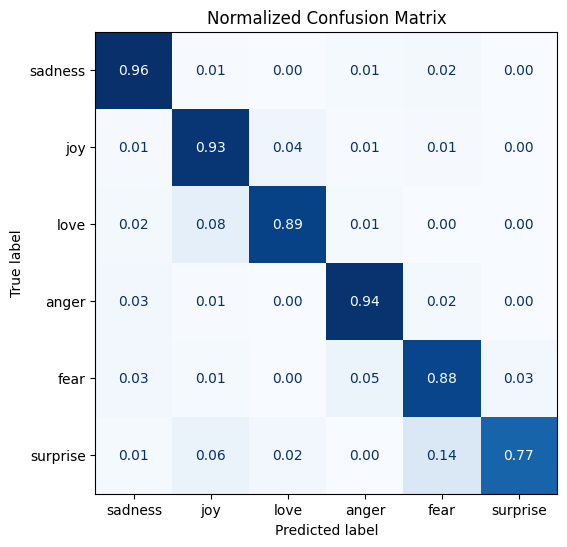

In [ ]:
#Write a code to plot confusion matrix
# Your code

In [75]:
# Let's predict any example

from transformers import pipeline

classifier = pipeline("text-classification", model = model,tokenizer=tokenizer)

In [76]:
# Write a random sentence which highlights any of our 6 emotions in the target feature
custom_tweet = "I saw Harry Potter today and it was really good."
preds = classifier(custom_tweet, return_all_scores=True)

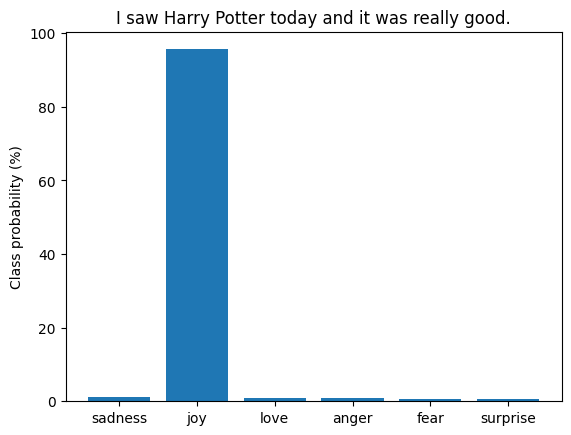

In [77]:
preds_df = pd.DataFrame(preds[0])
plt.bar(labels, 100 *preds_df["score"], color='C0')
plt.title(f"{custom_tweet}")
plt.ylabel("Class probability (%)")
plt.show()